# Training a perceptron; First steps with scikit-learn.

- We will only use the 2 features from the Iris dataset for visualisation purposes.
- We will assign the petal length and the petal width of the 150 flower samples to the feature matrix ```X```.
- The corresponding class labels of the flower species are assigned to the vector ```y```.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we are only interested in the petal length and the petal width.
y = iris.target
print('Class labels: {}.'.format(np.unique(y)))

Class labels: [0 1 2].


## Evaluation

In order to evaluate how well a trained model performs on unseens data, we will further split the dataset into separate training and test datasets.

In the following we randomply split the X and y arrays into 30 percent test data (45 samples) and 70 percent training data (105 samples).

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

### Comments on the above code

- ```train_test_split``` function already shuffles the training sets internally before splitting.
- Stratification means that the ```train_test_split``` method returns training and test subsets that have the same proportions of class labels as the input dataset.  We can use NumPy's ```bincount``` function, which counts the number of occurrences of each value in an array.

In [3]:
print('Label counts in y: {}'.format(np.bincount(y)))
print('Label counts in y_train: {}'.format(np.bincount(y_train)))
print('Label counts in t_test: {}'.format(np.bincount(y_test)))

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in t_test: [15 15 15]


## Standardisation

Up next, we standardise the features using the ```StandardScaler``` class from scikit-learn's ```preprocessing``` module.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Comments on the above code

- Using the ```fit``` method, ```StandardScaler``` estimated the parameters $\mu$ and $\sigma$ for each feature dimension from the training data.
- By calling the transform method, we then standardise the training data using those estimated parameters $\mu$ and $\sigma$.

## One-versus-Rest (OvR)

- scikit-learn already supports multiclass classification by default via the OvR method.
- This allows us to feed the 3 flower classes to the perceptron all at once.

The code is as follows:

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

## Making predictions via the ```predict``` method:

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {}'.format((y_test != y_pred).sum()))

Misclassified samples: 3


## Performance metrics

The scikit-learn library also implements a large variety of different performance metrics that are available via the ```metrics``` module.

For example, we can calculate the classification accuracy of the perceptron on the test set as follows:

In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.93


Alternatively, each classifier in scikit-learn has a ```score``` method, which computes a classifier's prediction accuracy by combining the ```predict``` call with ```accuracy_score``` as shown here:

In [8]:
print('Accuracy: {0:.2f}'.format(ppn.score(X_test_std, y_test)))

Accuracy: 0.93


## Decision regions

Finally we get to use our ```plot_decision_regions``` function from Chapter 2 to plot the decision regions or our newly trained perceptron model and visualise how well it separates the different flower samples.  However, let's add a small modification to highlight the samples from the test dataset via small circles:

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup the marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surfaces
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight the test samples
    if test_idx:
        # plot all the test samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1.0, marker='o',
                    s=100, label='test set')

With the slight modification that we made to the ```plot_decision_regions``` function, we can now specifythe indices of the samples that we want to mark on the resulting plots.  The code is as follows:

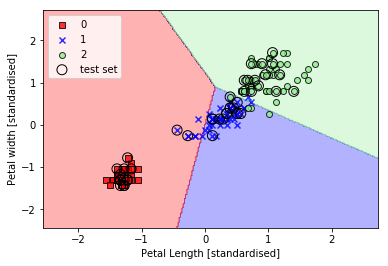

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal Length [standardised]')
plt.ylabel('Petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

## Discussion

As we can see in the resulting plot, the 3 flower classes cannot be perfectly separated by a linear decision boundary.

Remember that the perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.

In the upcoming sections, we will look at more powerful linear classifiers that converge to a cost minimum even if the classes are not perfectly linearly separable.

# The Sigmoid Function

We are interested in predicting the probability that a certain sample belongs to a particular class, which is actually the inverse form of the ```logit``` function:

$$
logit(p) = log\left( \frac{p}{1 - p} \right)
$$
Moreover, the ```logit``` function takes as input values that are in the range $\left[ 0; 1 \right]$, and transforms them to values over the **entire real-number range**.  We use this property to express a linear relationship between feature values and the ```logit``` function (log-odds):

$$
logit(p) = \sum\limits_{i=0}^{m}w_i x_i = z
$$

Through algebraic manipulation it becomes clear that:

$$
\phi(z) = p = \frac{1}{1 + e^{-z}}
$$

Here, z is the net-input, the linear combination of weights and sample features.

Now let us simply plot the sigmoid function for some values in the range of -7 to 7 just to see how it looks:

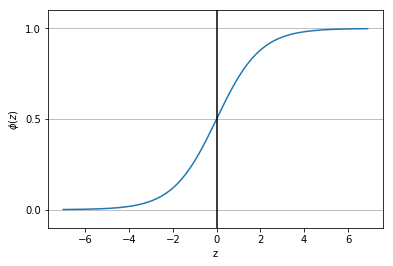

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='black')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridlines
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

## Properties of the Sigmoid Function

- We can see that $\phi(z)$ approaches 1 if $z$ goes towards inifinity.
- $\phi(z)$ goes towards 0 for $z \rightarrow -\infty$
- This sigmoid function takes real-number values as input and transforms them into values in the range $\left[ 0; 1\right]$.
- An intercept occurs at $\left( 0; 0.5 \right)$

# Learning the weights of the logistic cost function.

Let us rewrite the log-likelihood as a cost function $J$ that can be minimised using the gradient descent method:

$$
J\left( \mathbf{w} \right) = \sum\limits_{i = 1}^{n}\left[ -y^{(i)}\log\left( \phi\left( z^{(i)} \right) \right) - \left( 1 - y^{(i)} \right)\log\left( 1 - \phi\left( z^{(i)} \right) \right) \right]
$$

To get a better gras of this cost function, let us take a look at the cost that we have to calculate for **one single-sample training instance**:
$$
J\left( \phi(z),y;\mathbf{w} \right) = -y\log\left( \phi(z) \right) - (1 - y)\log\left( 1 - \phi(z) \right)
$$

Looking at this equation, we can see that the first term becomes zero is $y = 0$, and that the second term becomes zero if $y = 1$:
$$
J\left( \phi(z),y;\mathbf{w} \right) = 
\left\{
    \begin{array}{ll}
        -\log\left( \phi(z) \right) & \mbox{if } y = 1 \\
        -\log\left( 1 - \phi(z) \right) & \mbox{if } y = 0
    \end{array}
\right.
$$

Let us write a short code snippet to create a plot that illustrates the cost of classifying a single-sample instance for different values of $\phi(z)$:

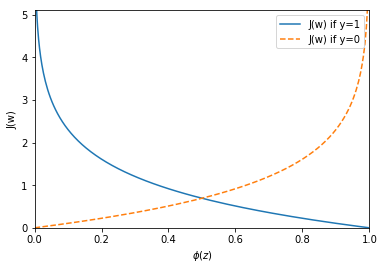

In [12]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim([0.0, 5.1])
plt.xlim([0, 1])
plt.xlabel('$\phi(z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

## Comment on the above code

We can see that the cost approaches 0 (continuous line) if we correctly predict that a sample belongs to class 1.  Similarly, we can see on the y-axis that the cost also approaches 0 if we correctly predict that $y = 0$ (dashed line).  However, if the prediction is wrong, the cost tends towards infinity.
**The main point is that we penalize wrong predictions with an increasingly larger cost.**

# Converting an Adaline implementation into an algorithm for logistic regression

- Substitute the cost function $j$ in our Adaline implementation with the new cost function.
- Swap the linear activation function with the sigmoid activation function.
- Change the threshold function to return class labels 0 and 1, instead of -1 and 1.

In [13]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.
    
    -----------
    Parameters:
    -----------
    eta: float
        The learning rate which is between 0.0 and 1.0.
    n_iter: int
        The number of passes over the training dataset.
    random_state: int
        Pseudo Random Number generator seed for random weight initialisation.
    
    -----------
    Attributes:
    -----------
    w_: 1d-array
        The weights after fitting.
    cost_: list
        The logistic cost function.
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def net_input(self, X):
        """
        Calculate the net input
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """
        Compute the logistic sigmoid activation.
        Given an interval, values outside the interval are clipped to the interval edges.
        For example, if an interval of [0, 1] is specified, values smaller than 0 become 0,
        and values larger than 1 become 1.
        """
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """
        Return the class label after applying the threshold function.
        """
        return np.where(self.net_input(X) >= 0, 1, 0)
        # This is equivalent to:
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def fit(self, X, y):
        """
        Fit the training data.
        
        -----------
        Parameters:
        -----------
        X: array-like with shape = [n_samples rows, by n_features columns]
            Training vectors, where n_samples is the number of samples (flowers), and
            n_features is the number of features (dimensions).
        y: array-like with shape = [n_samples of rows]
        
        --------
        Returns:
        --------
        self.object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)  # give me z
            output = self.activation(net_input)  # give me phi(z), sigmoid output, probability
            errors = (y - output)  # True class label - probability
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Note that now we compute the logistic `cost` instead of the sum of squared errors cost.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

When we fit a logistic regression model, we have to keep in mind that it only works for binary classification tasks.

So let us consider only ```Iris-setosa``` and ```Iris-versicolor``` flowers (classes 0 and 1), and check that our implementation of logistic regression works.

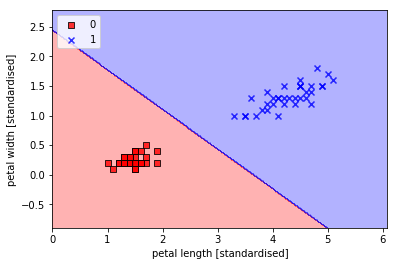

In [14]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

# Training a logistic regression model with scikit learn

Now, let's learn how to use sckit-learn's more optimized  implementation of logistic regression that also supports multi-class settings off the shelf (OvR by default).

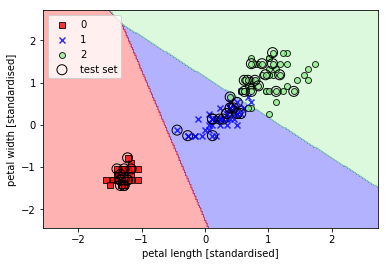

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)  # Inverse of regularization strength; must be a positive float.
# Like in support vector machines, smaller values specify stronger regularization.
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

In [16]:
# Computing the probability that training samples belong to a certain class:
lr.predict_proba(X_test_std[:3, :])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [17]:
# Notice that all the columns (in each row) should sum up to 1:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [18]:
# Getting the predicted class labels by identifying the largest column in each row.
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [19]:
# The shortest approach to predicting the class labels:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

## A word of caution

scikit-learn expects a 2-dimensional array as data iput.  Thus, when we want to predict the class label of a single sample, we have to convert the single row slice into such a format first.  One way to convert a single row entry into a two-dimensional data array is to use NumPy's ```reshape``` method to add a new dimension, as demonstrated in the following:

In [20]:
print(X_test_std[0, :].reshape(1, -1))
print(X_test_std[0, :])
lr.predict(X_test_std[0, :].reshape(1, -1))

[[0.89820289 1.44465434]]
[0.89820289 1.44465434]


array([2])

# Tackling Overfitting via Regularization

The term ```C``` is directly related to the regularisation parameter $\lambda$, which is its inverse.  Consequently, decreasing the value of the inverse regularisation parameter ```C``` means that we are increasing the regularisation strength, which we can visualise by plotting the L2-regularisation path for the 2-weight coefficients.

For the purposes of illustration, we will only collect the weight coefficients of class ```1``` (here, the second class in the dataset, ```Iris-versicolor```) versus all other classifiers.  Remember that we are using the OvR technique for multiclass classification.

As we shall see in the resulting plot, the weight coefficients shrink if we decrease parameter ```C```, that is, if we increase the regularisation strength.

c = -5, lr.coef_[1] = [9.45878506e-05 5.79838610e-05]
c = -4, lr.coef_[1] = [0.00094234 0.00057633]
c = -3, lr.coef_[1] = [0.00908693 0.00543008]
c = -2, lr.coef_[1] = [0.06861643 0.0323562 ]
c = -1, lr.coef_[1] = [ 0.30021622 -0.03573412]
c = 0, lr.coef_[1] = [ 1.14270612 -0.80805414]
c = 1, lr.coef_[1] = [ 2.13602295 -1.79607494]
c = 2, lr.coef_[1] = [ 2.38375195 -2.04552965]
c = 3, lr.coef_[1] = [ 2.41282464 -2.07486482]
c = 4, lr.coef_[1] = [ 2.41578403 -2.07785161]


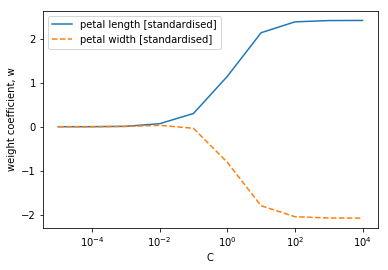

In [21]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    print('c = {0:d}, lr.coef_[1] = {1}'.format(c, lr.coef_[1]))
    print('='*20)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length [standardised]')
plt.plot(params, weights[:, 1], label='petal width [standardised]', linestyle='--')
plt.ylabel('weight coefficient, w')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

plt.show()

## Linear SVM

Now that we have learned the basic concepts behind a linear SVM, let us train an SVM model to classify the different flowers in our Iris dataset:

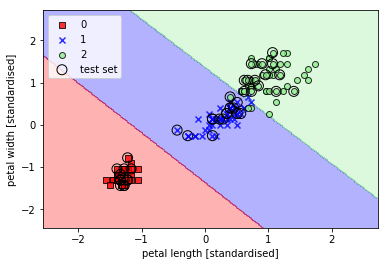

In [22]:
from sklearn.svm import SVC

# C-Support Vector Classification.

svm = SVC(kernel='linear', C=1, random_state=1)
# kernel specifies the kernel type to be used in the algorithm.
# It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
# If none is given, ‘rbf’ will be used.

# C is the penalty parameter of the error term.
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

# Solving nonlinear problems using a kernel SVM

Another reason why SVMs enjoy high popularity among machine learning practitioners is that it can be easily kernelized to solve nonlinear classification problems.  Before we discuss the main concept behind a kernel SVM, let's first create a sample dataset to see what such a nonlinear classification problem may look like.

## Kernel methods for linearly inseparable data

Using the following code, we will create a simple dataset that has the form of an ```XOR``` gate using the ```logical_or``` function from NumPy, where 100 samples will be assigned the class label 1, and 100 samples will be assigned the class label -1:

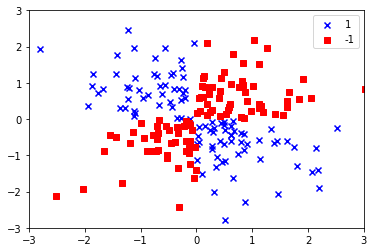

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200, 2)
# Return a sample (or samples) from the “standard normal” distribution.
# If positive, int_like or int-convertible arguments are provided,
# randn generates an array of shape (d0, d1, ..., dn),
# filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
# Compute the truth value of x1 XOR x2, element-wise.
# For example:
# >>> np.logical_xor([True, True, False, False], [True, False, True, False])
# array([False,  True,  True, False])
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

# Using the kernel trick to find separating hyperplanes in high-dimensional space

Let us see if we can train a kernel SVM that is able to draw nonlinear decision boundary that separates the XOR data well.  Here we simply use the ```SVC``` class from sci-kit learn that we imported earlier and replace ```kernel='linear'``` parameter with ```kernel='rbf'```: 

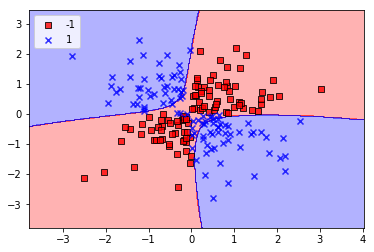

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
# C is an (optional) float, it defaults to 1.0.
# C represents the Penalty parameter of the error term.

# gamma is an (optional) float that defaults to gamma='auto'
# Gamma is the kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
# If gamma is 'auto', then 1/n_features will be used instead.
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

As we can see in the above plot, the kernel SVM separates the XOR data relatively well.

The $\gamma$ parameter, which we set to ```gamma=0.1```, can be understood as a cut-off parameter for the Gaussian sphere.  If we increase the value fo $\gamma$, we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary.

To get a better intuition for $\gamma$, let us apply an RBF kernel SVM to our Iris flower dataset.

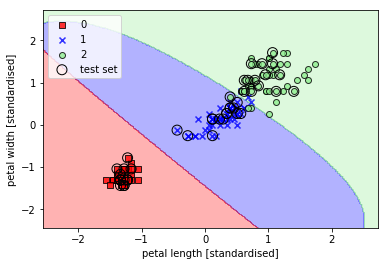

In [25]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

Since we chose a relatively small value for $\gamma$, the resulting decision boundary of the RBF kernel SVM model will be relatively soft, as shown in the above figure.

Now let us increase the value of $\gamma$ and observe the effect on the decision boundary:

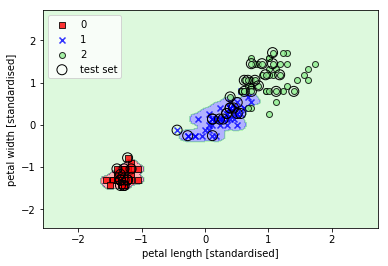

In [26]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()

In the resulting plot above, we can now see that the decision boundary around classes ```0``` and ```1``` is much tighter using a relatively large value of $\gamma$.

Although the model fits the training dataset very well, such a classifer will like have a high generalisation error on unseen data.  This illustrates that the $\gamma$ parameter also plays an important role in controlling overfitting.

# Decision tree learning

For a more visual comparison of the three different impurity criteria that we discussed previously, let us plot the impurity indices for the probability range $\left[0;1 \right]$ for class 1.  Note that we will also add a scaled version of the entropy (entropy / 2) to observe that the Gini impurity is an intermediate measure between the entropy and the classification error.

The code is as follows:

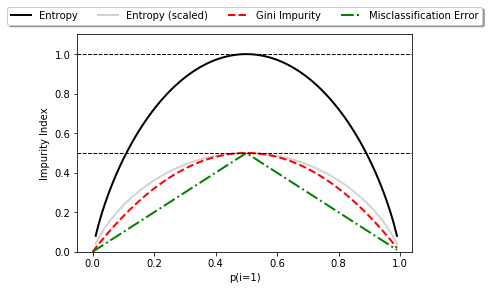

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - p) + (1 - p)*(1 - (1 - p))

def entropy(p):
    return -p*np.log2(p) - (1 - p)*np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]

err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=True)
ax.axhline(y=0.5, linewidth=1, color='black', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='black', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Building a Decision Tree

Using scikit-learn, we will now train a decision tree with a maximum depth of 3, using entropy as a cireterion for impurity.  Although feature scaling may be desired for visualisation purposes, note that feature scaling is not a requirement for decision tree algorithms.

The code is as follows:

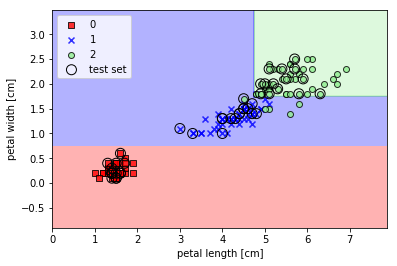

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

After executing the code example, we get the typical axis-parallel decision boundaries of the decision tree.

The following code will create an image of our decision tree in PNG format in our local directory:

In [29]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

![tree-viz](tree.png)

By using the ```out_file=None``` setting, we directly assigned the dot data to a ```dot_data``` variable, instead of writing an intermediate ```tree.dot``` file to disk.  The arguments for ```filled```, ```rounded```, ```class_names```, and ```feature_names``` are optional but make the resulting image file visually more appealing by adding color, rounding the box edges, showing the name of the majority class label at each node, and displaying the feature names in the splitting criterion.

# Random Forests

Conveniently, we don't have to construct the random forest classifier from the individual trees by ourselves because there is already an implementation in scikit-learn that we can use.  After executing the preceding code, we should see the decision regions formed by the ensemble of trees in the random forest, as shown in the upcoming figure.

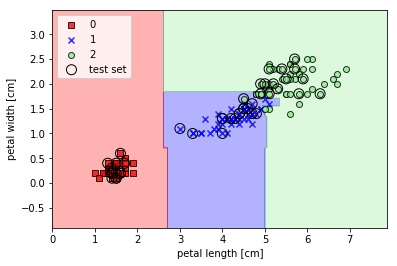

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)

# The number of jobs to run in parallel for both fit and predict.
# If -1, then the number of jobs is set to the number of cores.

forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

Using the preceding code, we trained a random forest from 25 decision trees via the ```n_estimators``` parameter and used the gini criterion as an impurity measure to split the nodes.  Although we are growing a very small forest from a very small training dataset, we used the ```n_jobs``` parameter for demonstration purposes, which allows us to parallellize the model training using multiple cores or our computer (in this particular example, 2 cores.)

# K-nearest neighbors - a lazy learning algorithm

By executing the following code, we will now implement a KNN model in scikit-learn using a Euclidean distance metric:

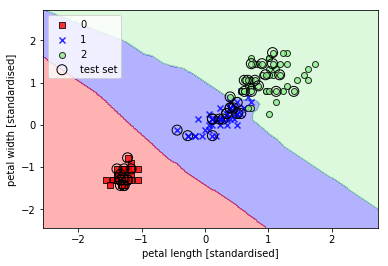

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardised]')
plt.ylabel('petal width [standardised]')
plt.legend(loc='upper left')
plt.show()